# LAB Sheet-07: Linear Regression

### Submitted by: Vatsalya Gupta, SC19B098, B.Tech. ECE VII Semester

### Part 1.
This is a simple linear regression exercise, which is to be solved by least squares technique.
Using the data provided, the best straight line fitting the data points is to be evaluated. i.e find the coefficients $b_{0}, b_{1}$ of the line $y = b_{0}+b_{1}x$. 

(a)	Read the [Sweden auto insurance data set](https://www.kaggle.com/datasets/sunmarkil/auto-insurance-in-sweden-small-dataset), split it into training and testing sets.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df_raw = pd.read_csv('insurance.csv', sep = 'delimiter', header = None,  engine = 'python')
df = df_raw.drop([0, 1, 2, 3], axis = 0).reset_index(drop = True).rename(columns = {0:'No_of_claims'})
df = df.No_of_claims.str.split(',',expand = True).rename(columns = {0:'No_of_claims', 1:'Total_payment'})
df.head()

,No_of_claims,Total_payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No_of_claims   63 non-null     object
 1   Total_payment  63 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [4]:
df.No_of_claims = pd.to_numeric(df.No_of_claims, errors = 'coerce')
df.Total_payment = pd.to_numeric(df.Total_payment, errors = 'coerce')

In [5]:
X = df.No_of_claims.to_numpy()
y = df.Total_payment.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

(b)	Using the training set Compute the mean and variance of each variable (i.e. x and y)

In [6]:
X_mean = np.mean(X_train)
y_mean = np.mean(y_train)
X_var = np.var(X_train)
y_var = np.var(y_train)

print('Mean of Number of claims :', X_mean)
print('Mean of Total payment settled(in 1000 swedish kronor) :', y_mean)
print('Variance of Number of claims :', X_var)
print('Variance of Total payment settled(in 1000 swedish kronor) :', y_var)

Mean of Number of claims : 18.386363636363637
Mean of Total payment settled(in 1000 swedish kronor) : 78.62272727272727
Variance of Number of claims : 228.37345041322314
Variance of Total payment settled(in 1000 swedish kronor) : 4443.694938016528


(c)	Compute the covariance between the two variables (i.e Cov(x,y))

In [7]:
cov_xy = np.cov(X_train, y_train)
cov_xy = cov_xy[0, 1]  # or cov_xy[1, 0]

print('Covariance:', cov_xy)

Covariance: 866.3375264270614


(d) Find the coefficients of the best fitting straight line.The coefficients are given by following formulae
$$b_{1} = \frac{Cov(x,y)}{var(x)}$$ ,
$$b_{0} = mean(y)-b_{1} mean(x)$$.


In [8]:
# Your code solution here
b1 = cov_xy / X_var
b0 = y_mean - b1 * X_mean

print('b1 =', b1)
print('b0 =', b0)

b1 = 3.793512445774648
b0 = 8.873827985643402


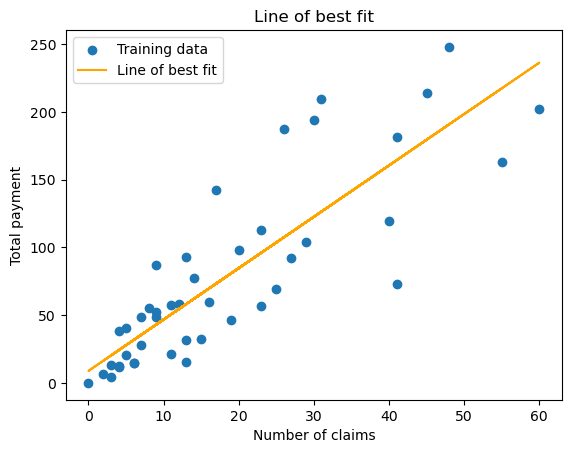

In [9]:
poly_fit = np.poly1d([b1, b0])
y_fit = poly_fit(X_train)

plt.scatter(X_train, y_train)
plt.plot(X_train, y_fit, color = 'orange')

plt.title('Line of best fit')
plt.xlabel('Number of claims')
plt.ylabel('Total payment')
plt.legend(['Training data', 'Line of best fit'])

(e)	Perform the prediction on test data set using the regression solution and compute the root mean squared error between original data values and predicted values. 

In [10]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

Root Mean Square (RMS) Error : 37.381273705674836


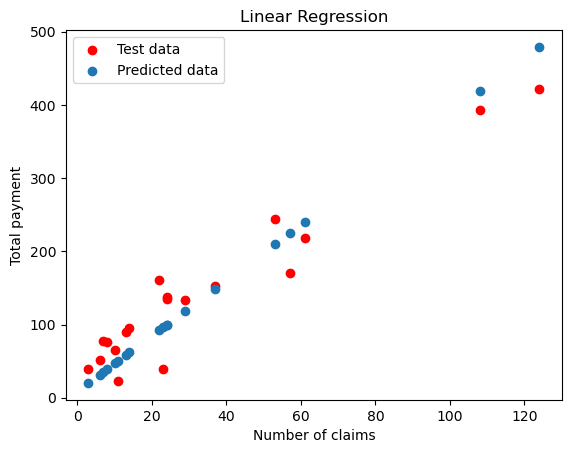

In [11]:
y_pred = poly_fit(X_test)
rmse = rmse(y_pred, y_test)
print('Root Mean Square (RMS) Error :', rmse)

plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred)

plt.title('Linear Regression')
plt.xlabel('Number of claims')
plt.ylabel('Total payment')
plt.legend(['Test data', 'Predicted data'])

### Part 2.
Solve the above problem(Part 1.) with linear algebra.
The idea is to form the overdetermined system of linear equations of the form $y = b_{0}+b_{1}x$.

The least squares solution for:
$X b = Y$
is given by 
$b = (X^{T}X)^{-1}X^{T}Y$.
Plot the regression line and data points.

In [12]:
def weights(x, y, degree):
    n = degree
    A = np.zeros((n + 1, n + 1))
    b = np.zeros((n + 1, 1))

    # Solving A b = c
    for i in range(n + 1):
        for j in range(n + 1):
            A[i, j] = sum(x ** (i + j))
        b[i] = sum(x ** (i) * y)

    # Generating weights for polynomial function with degree
    c = np.dot(np.linalg.inv(A), b)
    c = np.flip(c)
    c = c.ravel()
    return c

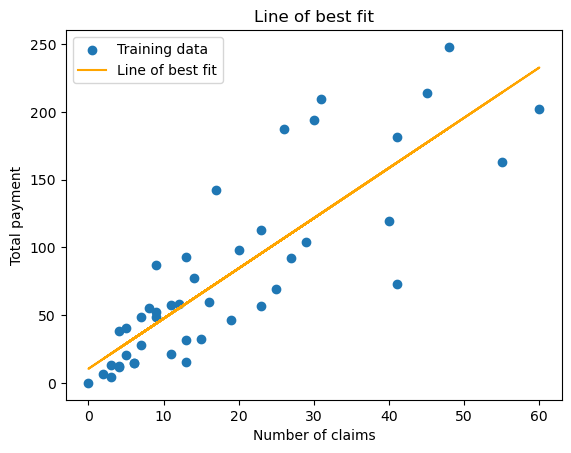

In [13]:
order = 1
coefficients = weights(X_train, y_train, order)
poly_fit = np.poly1d(coefficients)
y_fit = poly_fit(X_train)

plt.scatter(X_train, y_train)
plt.plot(X_train, y_fit, color = 'orange')

plt.title('Line of best fit')
plt.xlabel('Number of claims')
plt.ylabel('Total payment')
plt.legend(['Training data', 'Line of best fit'])